<a href="https://colab.research.google.com/github/ncampbell1/MonopolyStats/blob/main/Copy_of_Monopoly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linked List Class potentially as just the board class


Nodes Class being the monopoly spaces (Property, Pay, Jail, etc.)


In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np

#rolls the 2 dice
def rollDice ():
  #Returns total from the 2 dice rolling
  total = 0
  for i in range ( 2 ):
    total += random.randint (1 , 6)
  return total

In [ ]:
#class that holds the properties 
#if the space isn't a normal property, price and rent will be 0 (Jail, Go, Chance, etc.)
#color variable groups the properties into "monopolies"
class Properties(object):
  def __init__(self, name, color, price, rent, monopoly = False):
    self.name = name
    self.color= color
    self.price = price
    self.rent = rent
    self.owned = False
    self.owner = "None"
    self.monopoly = monopoly
    self.revenue = 0
    #To keep track of the stats on how many times properties are landed on, need variable
    self.timesLanded = 0
    #Make simulation values that does not reset between simulations to get averaged data
    self.simLanded = 0
    self.simRevenue = 0
    

  def landedOn(self):
    """Counts the number of times a property is landed on for statistical models"""
    self.timesLanded += 1
    self.simLanded += 1
    #Every time this property is landed on, it will also calculate the total revenue the property has made
    self.revenue += self.rent
    self.simRevenue += self.rent
  
  def bought(self):
    """Sets property to be bought"""
    self.owned = True
  
  def newOwner(self, Player):
    """Sets the owner of the property"""
    self.owner = Player
    #print("Im in the owner function!")

  def reset(self):
    """Resets initial game conditiions"""
    self.owned = False
    self.owner = "None"
    self.timesLanded = 0
    self.revenue = 0

  def monopolize(self, mult):
    """This function determines if the player has a monopoly, multiply the rent"""
    self.monopoly = true
    self.rent *= mult







In [ ]:
Brown1= Properties("Mediterranean Ave", "Brown", 60, 2)
Brown2 = Properties("Baltic Ave", "Brown", 60, 4)
LBlue1= Properties ("Oriental Ave", "Light Blue", 100, 6)
LBlue2= Properties("Vermont Ave", "Light Blue", 100, 6)
LBlue3= Properties ("Connecticut Ave", "Light Blue", 120, 8)
Pink1= Properties ("St. Charles Place", "Pink", 140, 10)
Pink2= Properties ("States Ave", "Pink", 140, 10)
Pink3= Properties ("Virginia Ave", "Pink", 160, 12)
Orange1= Properties ("St. James Place", "Orange", 180, 14)
Orange2= Properties ("Tennesse Ave", "Orange", 180, 14)
Orange3= Properties ("New York Ave", "Orange", 180, 16)
Red1= Properties ("Kentucky Ave", "Red", 220, 18)
Red2= Properties ("Indiana Ave", "Red", 220, 18)
Red3= Properties ("Illinois Ave", "Red", 240, 20)
Yellow1= Properties ("Atlantic Ave", "Yellow", 260, 22)
Yellow2= Properties ("Ventnor Ave", "Yellow", 260, 22)
Yellow3= Properties ("Marvin Gardens", "Yellow", 280, 24)
Green1= Properties ("Pacific Ave", "Green", 300, 26)
Green2= Properties ("North Carolina Ave", "Green", 300, 26)
Green3= Properties ("Pennsylvania Ave", "Green", 320, 28)
DBlue1= Properties ("Park Place", "Dark Blue", 350, 35)
DBlue2= Properties ("Boardwalk", "Dark Blue", 400, 50)

#Some of the propertiy "rules" are changed for similification
#For instance, the electric company and water works are supposed to be x4 the dice, but it might be easier to just make it a rent of 35 (7x5)


Special1= Properties("Reading Railroad", "Railroad", 200, 25)
#change in rules= 4x die=== 35$
Special2= Properties("Electric Company", "Railroad", 150, 35)
Special3= Properties("Pennsylvania Railroad", "Railroad", 200, 25)
Special4= Properties("B. & O. Railroad", "Railroad", 200, 25)
Special5= Properties("Water Works", "Utility", 150, 35)
Special6= Properties("Short Line", "Utility", 200, 25)

#Another example I thought of maybe "simplifying" the game could be change Chance/Community Chest to be a random selection of either -$50 or +$50??

monopolies = [[Brown1, Brown2],[LBlue1, LBlue2, LBlue3],[Pink1, Pink2, Pink3],[Orange1, Orange2, Orange3], [Red1, Red2, Red3], [Yellow1, Yellow2, Yellow3], [Green1, Green2, Green3], [DBlue1, DBlue2], [Special5, Special6], [Special1, Special2, Special3, Special4]]
colorsIndicis = {"Brown" : 0, "Light Blue" : 1, "Pink" : 2, "Orange" : 3, "Red" : 4, "Yellow" : 5, "Green" : 6, "Dark Blue" : 7, "Utility" : 8, "Railroad" : 9 }

Go= Properties("Go", "Go,", 0, 0)
CommunityChest= Properties("Community Chest", "Chance", 0, 0)
IncomeTax= Properties("Income Tax", "Tax", 0, 0)
Chance= Properties("Chance", "Chance", 0, 0)
Jail= Properties("Jail", "None", 0, 0)
FreeParking= Properties("Free Parking", "None", 0, 0)
GoToJail= Properties("Go to Jail", "Jail", 0, 0)
LuxeryTax= Properties("Luxery Tax", "Tax", 0, 0)




In [ ]:
#Class that keeps track of the player and their game action
class Player(object):
  def __init__(self, name, style, number, money = 1500, properties = []):
    self.name = name
    self.style = style
    self.number = number
    self.money = money
    self.properties= properties
    self.position = space1
    self.bankrupt= False

  def __str__(self):
    return "Name: " + self.name + " Play Style: " + str(self.style) + " Amount of Money: $" + str(self.money) + " Properties Owned: " + str(self.properties)

  def movePosition(self):
    """This function moves the Player to the new space based on their dice roll"""
    currentSpace = self.position
    spacesToMove = rollDice()
    #print(spacesToMove)
    #moves them on the board
    for moves in range(spacesToMove):
       currentSpace = self.position.next
       self.position = currentSpace
       #if they pass go on this turn-- collect $200
       if(self.position.data.name == "Go"):
         self.money += 200
         #print("Pass 'Go' collect $200")
    self.position.data.landedOn()
    #If we land on Go to Jail, move player to jail (lose 50$, don't collect $200)
    if(self.position.data.name == "Go to Jail"):
      for k in range(20):
        currentSpace = self.position.next
        self.position = currentSpace
      self.money = self.money - 50
    #print(self.position.data.name)
    return self.position.data.name
      
  def buy(self, Node):
    """This function is for if a player wants to buy a property and the potential things that can happen"""
    #if (Node.data.price == 0):
      #print("This isn't a property for sale")
    if (Node.data.price !=0):
      if (Node.data.owned == True):
        #print("This property is already owned")
        self.payRent(Node)
      else:
        #if (self.money < Node.data.price):
          #print("You don't have enough money to buy " + Node.data.name)
        if (self.money>= Node.data.price):
          if (self.style == "slums" and (colorsIndicis[self.position.data.color]== 0 or colorsIndicis[self.position.data.color]== 1 or colorsIndicis[self.position.data.color]== 2)):
            #add this property to the player's list of their properties
            self.properties.append(Node.data.name)
            self.money = self.money - Node.data.price
            Node.data.bought()
            Node.data.newOwner(self)
          #print(self.name + " bought " + Node.data.name) Used mostly for debugging purposes
            self.checkMonopoly(Node.data)
          elif (self.style == "middle" and (colorsIndicis[self.position.data.color]== 3 or colorsIndicis[self.position.data.color]== 4 or colorsIndicis[self.position.data.color]== 5)):
            #add this property to the player's list of their properties
            self.properties.append(Node.data.name)
            self.money = self.money - Node.data.price
            Node.data.bought()
            Node.data.newOwner(self)
            #print(self.name + " bought " + Node.data.name) Used mostly for debugging purposes
            self.checkMonopoly(Node.data)
          elif (self.style == "riches" and (colorsIndicis[self.position.data.color]== 6 or colorsIndicis[self.position.data.color]== 7)):
            #add this property to the player's list of their properties
            self.properties.append(Node.data.name)
            self.money = self.money - Node.data.price
            Node.data.bought()
            Node.data.newOwner(self)
            #print(self.name + " bought " + Node.data.name) Used mostly for debugging purposes
            self.checkMonopoly(Node.data)
          elif (self.style == "utilities" and (colorsIndicis[self.position.data.color]== 8 or colorsIndicis[self.position.data.color]== 9)):
            #add this property to the player's list of their properties
            self.properties.append(Node.data.name)
            self.money = self.money - Node.data.price
            Node.data.bought()
            Node.data.newOwner(self)
            #print(self.name + " bought " + Node.data.name) Used mostly for debugging purposes
            self.checkMonopoly(Node.data)        
          elif (self.position.data.price <= self.money * self.number):
            #add this property to the player's list of their properties
            self.properties.append(Node.data.name)
            self.money = self.money - Node.data.price
            Node.data.bought()
            Node.data.newOwner(self)
            #print(self.name + " bought " + Node.data.name) Used mostly for debugging purposes
            self.checkMonopoly(Node.data)
          

  def payRent(self, Node):
    """The person who lands on this loses the amount of money on rent and gives that money to the owner"""
    self.money = self.money - Node.data.rent
    Node.data.owner.money += Node.data.rent
    #print(self.name + " paid " + Node.data.owner.name + " $" + str(Node.data.rent) + " in rent.")
  
  def checkMonopoly(self, prop):
    x = monopolies[colorsIndicis[prop.color]]
    count = 0
    for p in x:
      if p.owner == self.name:
        count += 1
      if prop.color == "Railroad":
        for p in x:
          if p.owner == self.name:
             x.monopolize(count)  
          else:
            if count == len(x):  
              for p in x:
                x.monopolize(2)


In [ ]:
#LinkedList for the Board

#Node class just stores the data and the "next" value
class Node:
  def __init__(self, data, next= ""): 
    self.data = data
    self.next = next

  def setNext(self):
    self.next = space1

#Board Spaces
space40= Node(DBlue2)
space39= Node(LuxeryTax, space40)
space38= Node(DBlue1, space39)
space37= Node(Chance, space38)
space36= Node(Special6, space37)
space35= Node(Green3, space36)
space34= Node(CommunityChest, space35)
space33= Node(Green2, space34)
space32= Node(Green1, space33)
space31= Node(GoToJail, space32)
space30= Node(Yellow3, space31)
space29= Node(Special5, space30)
space28= Node(Yellow2, space29)
space27= Node(Yellow1, space28)
space26= Node(Special4, space27)
space25= Node(Red3, space26)
space24= Node(Red2, space25)
space23= Node(Chance, space24)
space22= Node(Red1, space23)
space21= Node(FreeParking, space22)
space20= Node(Orange3, space21)
space19= Node(Orange2, space20)
space18= Node(CommunityChest, space19)
space17= Node(Orange1, space18)
space16= Node(Special3, space17)
space15= Node(Pink3, space16)
space14= Node(Pink2, space15)
space13= Node(Special2, space14)
space12= Node(Pink1, space13)
space11= Node(Jail, space12)
space10= Node(LBlue3, space11)
space9= Node(LBlue2, space10)
space8= Node(Chance, space9)
space7= Node(LBlue1, space8)
space6= Node(Special1, space7)
space5= Node(IncomeTax, space6)
space4= Node(Brown2, space5)
space3= Node(CommunityChest, space4)
space2= Node(Brown1, space3)
space1= Node(Go, space2)
space40.setNext()

#Example of how to call the "next" value's name
print(space3.next.data.name)


Baltic Ave


In [ ]:
def ChanceRolled():
  value = random.randint(0,1)
  if(value ==0):
    #print ("Player landed on Chance, lose $50")
    return -50
  if(value==1):
    #print ("Player landed on Chance, gain ")
    return 50

def Tax():
  return -100

In [ ]:
def rungame(players, f, p, turns):
  """Runs Monopoly with the players, the focus each player has in the game and the percentage of their money they will spend"""
  #Create game with 3 players, setting players focus and percentage of money to spend
  p1 = Player("p1", f[players[0][0]], p[players[0][1]])
  p2 = Player("p2", f[players[1][0]], p[players[1][1]])
  p3 = Player("p3", f[players[2][0]], p[players[2][1]])
  game = [p1, p2, p3]
  #implement running game of monopoly
  #Make a list of all the properties and reset the values in each property
  allProperties = [Brown1, Special1, Brown2, LBlue1, LBlue2, LBlue3, Pink1, Special2, Pink2, Pink3, Special3, Orange1, Orange2, Orange3, Red1, Red2, Red3, Special4, Yellow1, Yellow2, Special5, Yellow3, Green1, Green2, Green3, Special6, DBlue1, DBlue2]
  for all in allProperties:
    all.reset()
  for turn in range(turns):
    for player in game:
      #Start a monopoly game with a certain amount of turns
      player.movePosition()
      player.buy(player.position)

      #If we land on chance, go into the randomly giving/taking money
      if (player.position.data.color == 'Chance'):
        player.money += ChanceRolled()

      #If we land on tax, go into that function and pay taxes
      if (player.position.data.color == 'Tax'):
        player.money = player.money + Tax()

      if (player.money < 0):
        player.bankrupt = True
        #I want a way to say remove the player from the game, maybe we use players as a list and remove them from the list and reset their properties
  
  moneys = [p1.money, p2.money, p3.money]
  moneys.sort(reverse=True)
  while(moneys[0] == moneys[1]):
    for player in game:
      #Start a monopoly game with a certain amount of turns
      player.movePosition()
      player.buy(player.position)

      #If we land on chance, go into the randomly giving/taking money
      if (player.position.data.color == 'Chance'):
        player.money += ChanceRolled()

      #If we land on tax, go into that function and pay taxes
      if (player.position.data.color == 'Tax'):
        player.money = player.money + Tax()

      if (player.money < 0):
        player.bankrupt = True
    moneys = [p1.money, p2.money, p3.money]
    moneys.sort(reverse=True)
  if p1.money == moneys[0]:
    return 0
  elif p2.money == moneys[0]:
    return 1
  else:
    return 2



[[[589. 624. 601. 659. 557. 613. 557. 570. 600. 616.]
  [565. 620. 587. 653. 582. 574. 609. 603. 604. 623.]
  [532. 560. 601. 610. 547. 639. 596. 541. 636. 601.]
  [615. 628. 596. 620. 606. 590. 599. 561. 634. 618.]
  [611. 604. 600. 612. 616. 606. 600. 644. 596. 575.]]

 [[502. 349. 230. 190. 166. 148. 140. 137. 144. 143.]
  [466. 335. 218. 185. 161. 149. 168. 155. 129. 151.]
  [305. 280. 199. 169. 147. 160. 155. 133. 140. 131.]
  [348. 222. 175. 154. 137. 143. 159. 129. 156. 144.]
  [506. 327. 227. 195. 166. 155. 158. 146. 146. 122.]]]
0.7057393333333335
{'Park Place': 0.021602, 'Boardwalk': 0.022098, 'Mediterranean Ave': 0.022548666666666668, 'Reading Railroad': 0.023358666666666666, 'Baltic Ave': 0.023418, 'Short Line': 0.023510333333333334, 'Oriental Ave': 0.023596333333333334, 'St. Charles Place': 0.023687666666666666, 'Vermont Ave': 0.02383, 'Connecticut Ave': 0.023836, 'Electric Company': 0.024174666666666667, 'Pennsylvania Ave': 0.024447, 'States Ave': 0.024785, 'North Carolin

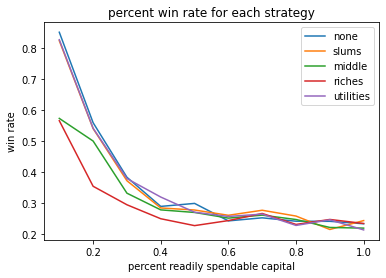

In [ ]:
def simulate():
  """Runs a simulation of the monopoly game, taking into account different play styles and spending percentages"""
  #define traits
  focus = ['none', 'slums', 'middle', 'riches', 'utilities']
  percent = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
  #save all players that play in wins[0], save every winner in wins[1]
  #creates 2 5x10 arrays
  wins = np.zeros([2,5,10],float)
  #however many times we want to run the game
  numSim = 10000
  for i in range(numSim):
    #set players with a random percent and random focus
    players = [[random.randint(0,4),random.randint(0,9)],[random.randint(0,4),random.randint(0,9)],[random.randint(0,4),random.randint(0,9)]]
    for i in range (0,3):
      wins[0,players[i][0],players[i][1]] += 1
      #play game
    winner = rungame(players, focus, percent, 100)
    wins[1,players[winner][0],players[winner][1]] += 1
  #plot strategy data
  winrate = wins[1]/wins[0]
  fig = plt.figure()
  gr = fig.add_subplot()
  plt.plot(percent, winrate[0], label = focus[0])
  plt.plot(percent, winrate[1], label = focus[1])
  plt.plot(percent, winrate[2], label = focus[2])
  plt.plot(percent, winrate[3], label = focus[3])
  plt.plot(percent, winrate[4], label = focus[4])
  gr.set_title('percent win rate for each strategy')
  gr.set_xlabel('percent readily spendable capital')
  gr.set_ylabel('win rate')
  plt.legend()
  print(wins)
    #Plot property stats: use dictionary to keep track of property name with times landed and revenue
  landedTimes = {}
  revenueCollected = {}
  allProperties = [Brown1, Special1, Brown2, LBlue1, LBlue2, LBlue3, Pink1, Special2, Pink2, Pink3, Special3, Orange1, Orange2, Orange3, Red1, Red2, Red3, Special4, Yellow1, Yellow2, Special5, Yellow3, Green1, Green2, Green3, Special6, DBlue1, DBlue2]
  for prop in allProperties:
    landedTimes[prop.name] = prop.simLanded / (100 * numSim * 3) #Divide by number of turns to get percent chance of landing
    revenueCollected[prop.name] = prop.simRevenue / numSim #Divide by number of games to get game average revenue
  #Sort the list according to value in the key going highest to lowest
  sortedLand = sorted(landedTimes.items(), key = lambda kv:kv[1])
  sortedLandDic = dict(sortedLand)
  sortedRev = sorted(revenueCollected.items(), key = lambda kv:kv[1])
  sortedRevDic = dict(sortedRev)
  print(sum(sortedLandDic.values()))
  print(sortedLandDic)
  print(sortedRevDic)
simulate()

In [ ]:

#Creates the players for the game
player1= Player("Player1", "Spend", 1, 1500, [])
player2= Player("Player2", "Spend", 2, 1500, [])
player3= Player("Player3", "Spend", 3, 1500, [])

#List of all the properties to easily reset
allProperties = [Brown1, Special1, Brown2, LBlue1, LBlue2, LBlue3, Pink1, Special2, Pink2, Pink3, Special3, Orange1, Orange2, Orange3, Red1, Red2, Red3, Special4, 
                 Yellow1, Yellow2, Special5, Yellow3, Green1, Green2, Green3, Special6, DBlue1, DBlue2]
for all in allProperties:
  all.reset()

#Play the game
Game2= [player1, player2, player3]
moves = 30
for turns in range(moves):
  for player in Game2:
    player.movePosition()
    #If the property is able to be bought, buy it
    if (player.position.data.price !=0):
      player.buy(player.position)

    #If we land on chance, go into the randomly giving/taking money
    if (player.position.data.color == 'Chance'):
      player.money += ChanceRolled()

    #If we land on tax, go into that function and pay taxes
    if (player.position.data.color == 'Tax'):
      player.money = player.money + Tax()

    if(player.money < 0):
      player.bankrupt = True

    #print(player.name, "= ", player.properties)
    #print(player.name, "= ", player.money)
    #print("")
landedTimes = {}
revenueCollected = {}
for prop in allProperties:
  #Percent chance of landing on the property 
  landedTimes[prop.name] = prop.simLanded 
  #Total revenue collected (in sim we should divide by number of games to get avereage per game revenue)
  revenueCollected[prop.name] = prop.simRevenue

sortedLand = sorted(landedTimes.items(), key = lambda kv:kv[1])
sortedLandDic = dict(sortedLand)
sortedRev = sorted(revenueCollected.items(), key = lambda kv:kv[1])
sortedRevDic = dict(sortedRev)
print("Properties Landed on:", sortedLandDic)
print("Properties Revenue: ",sortedRevDic)


    


Properties Landed on: {'Park Place': 64808, 'Boardwalk': 66294, 'Mediterranean Ave': 67647, 'Reading Railroad': 70077, 'Baltic Ave': 70258, 'Short Line': 70534, 'Oriental Ave': 70791, 'St. Charles Place': 71064, 'Vermont Ave': 71494, 'Connecticut Ave': 71509, 'Electric Company': 72529, 'Pennsylvania Ave': 73344, 'States Ave': 74358, 'North Carolina Ave': 76587, 'Virginia Ave': 77261, 'Pennsylvania Railroad': 79019, 'Indiana Ave': 79348, 'Pacific Ave': 79490, 'Illinois Ave': 79891, 'Marvin Gardens': 80077, 'Kentucky Ave': 80360, 'Water Works': 80602, 'Atlantic Ave': 80724, 'Ventnor Ave': 80829, 'B. & O. Railroad': 80979, 'St. James Place': 81920, 'New York Ave': 82341, 'Tennesse Ave': 83141}
Properties Revenue:  {'Mediterranean Ave': 135294, 'Baltic Ave': 281032, 'Oriental Ave': 424746, 'Vermont Ave': 428964, 'Connecticut Ave': 572072, 'St. Charles Place': 710640, 'States Ave': 743580, 'Virginia Ave': 927132, 'St. James Place': 1146880, 'Tennesse Ave': 1163974, 'New York Ave': 1317456, 

In [ ]:
def Test1Round():
  allProperties = [Brown1, Special1, Brown2, LBlue1, LBlue2, LBlue3, Pink1, Special2, Pink2, Pink3, Special3, Orange1, Orange2, Orange3, Red1, Red2, Red3, Special4, Yellow1, Yellow2, Special5, Yellow3, Green1, Green2, Green3, Special6, DBlue1, DBlue2]
  for prop in allProperties:
    prop.simLanded = 0
    prop.simRevenue = 0

    #reset the properties each round
    for all in allProperties:
      all.reset()
   
    #create players to have "slums" strategy
  Camille = Player("Camille", "Slums", 1, 1500, [])
    #players = [SlumsPlayer1, SlumsPlayer2, SlumsPlayer3]
    
  print (Camille.properties)

  keepPlaying = False
  numberOfRounds = 0


Test1Round()

[]
